# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

# from loguru import logger

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [49]:
fifa = pd.read_csv("fifa.csv")

In [50]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.


## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [90]:
# Eliminar null values
fifa = fifa.dropna()

# PCA
pca = PCA().fit(fifa)

In [86]:
def q1():
    # Retorne aqui o resultado da questão 1.
    
    return float(round(pca.explained_variance_ratio_[0],3))

q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [159]:
def q2():
    # Retorne aqui o resultado da questão 2.

    # Variancia acumulada
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    # Valor > .95
    return int(np.where(cum_var >= 0.95)[0][0] + 1) # Adicionar 1 pois a lista comeca em 0

q2()

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [88]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [160]:
def q3():
    # Retorne aqui o resultado da questão 3.
    
    return tuple(np.round(pca.components_.dot(x)[:2], 3))

q3()

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
def q4():
    # Retorne aqui o resultado da questão 4.
    # Select Variables
    y = fifa['Overall']
    x = fifa.drop('Overall', axis = 1)

    # Model
    model = LinearRegression()

    # Create RFE
    rfe = RFE(model, n_features_to_select = 5, step = 1)

    # Fit RFE
    rfe.fit(X = x, y = y)

    # Select Variables
    var = x.columns[rfe.support_]
    
    return list(var)

q4()

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']

# Adicional 

### PCA

Considerando as duas primeiras dimensoes do PCA é possível notar a formação de dois clusters um com os goleiros e outro com os demais jogadores

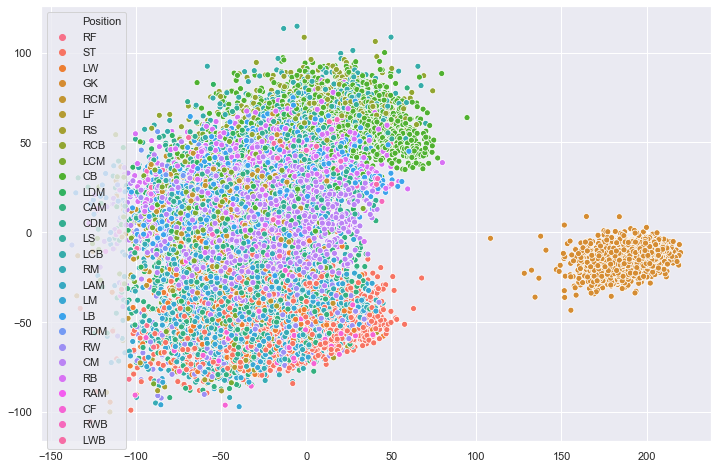

In [74]:
if __name__ == '__main__':
    
    # Dataframe original
    fifa_orig = pd.read_csv('fifa.csv', index_col = 0).dropna(subset = ['Preferred Foot'])

    # Transformacao PCA
    fifa_pca = pca.fit_transform(fifa)

    sns.scatterplot(x = fifa_pca[:,0], y = fifa_pca[:,1], hue = fifa_orig['Position'])
    plt.show()

### Removendo os goleiros

Removendo os goleiros os dados formam um grande cluster com os melhores jogadores nos extremos inferior e direito.

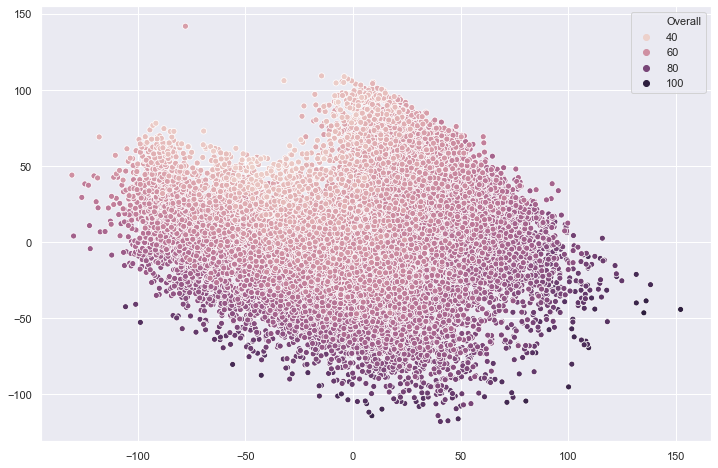

In [80]:
if __name__ == '__main__':
    
    # Carregar dados
    fifa_no_gk = pd.read_csv('fifa.csv').query('Position!="GK"').dropna(subset = ['Preferred Foot'])
    # Remover dados vazio
    fifa_no_gk_x = fifa_no_gk.drop(columns_to_drop, axis=1).dropna()

    fifa_pca_no_gk = PCA().fit_transform(fifa_no_gk_x)

    sns.scatterplot(x = fifa_pca_no_gk[:,0], y = fifa_pca_no_gk[:,1], hue = fifa_no_gk['Overall'])
    plt.show()

É possível ver a formação de cluster em torno de posições também

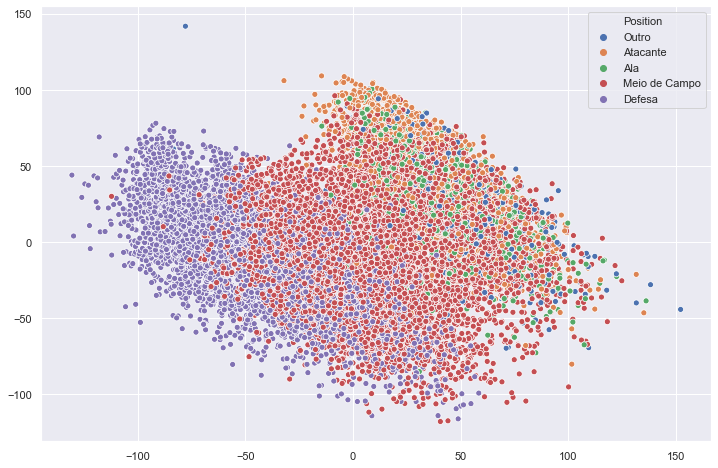

In [156]:
if __name__ == '__main__':
    
    def classifier(s):
    
        try:
            last_letter = s[-1]
        except:
            return 'Outro'

        if last_letter == 'B':
            return 'Defesa'
        if last_letter == 'M':
            return 'Meio de Campo'
        if s == 'ST':
            return 'Atacante'
        if last_letter == 'W':
            return 'Ala'
        else: 
            return 'Outro'
    
    # Carregar dados
    fifa_no_gk = pd.read_csv('fifa.csv').query('Position!="GK"').dropna(subset = ['Preferred Foot'])
    # Remover dados vazio
    fifa_no_gk_x = fifa_no_gk.drop(columns_to_drop, axis=1).dropna()

    fifa_pca_no_gk = PCA().fit_transform(fifa_no_gk_x)

    sns.scatterplot(x = fifa_pca_no_gk[:,0], y = fifa_pca_no_gk[:,1], hue = fifa_no_gk['Position'].apply(classifier))
    plt.show()

### T-sne

A execução da função TSNE é um pouco lenta

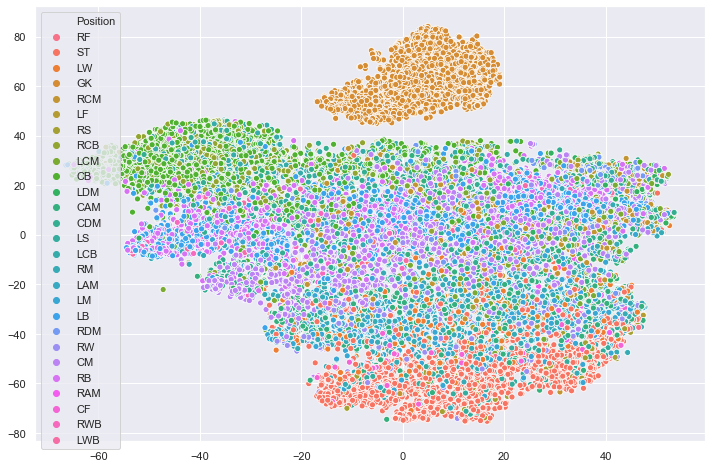

In [92]:
if __name__ == '__main__':

    from sklearn.manifold import TSNE

    # Transformacao PCA
    fifa_tsne = TSNE(n_components=2).fit_transform(fifa)

    sns.scatterplot(x = fifa_tsne[:,0], y = fifa_tsne[:,1], hue = fifa_orig['Position'])
    plt.show()

### T-SNE sem goleiros

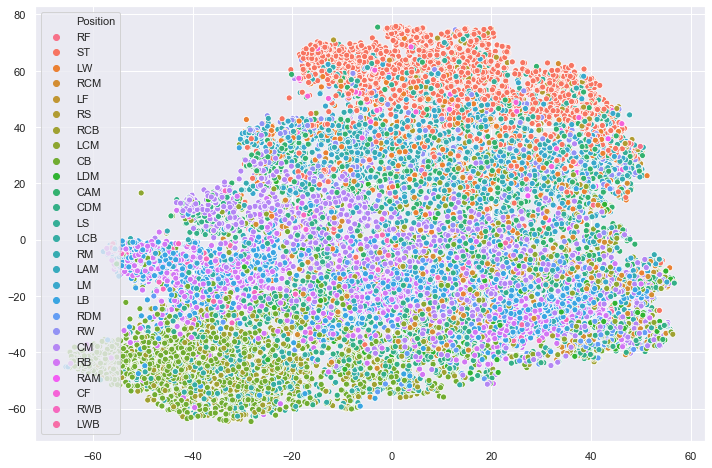

In [103]:
if __name__ == '__main__':

    # Carregar dados
    fifa_no_gk = pd.read_csv('fifa.csv').query('Position!="GK"').dropna(subset = ['Preferred Foot'])
    # Remover dados vazio
    fifa_no_gk_x = fifa_no_gk.drop(columns_to_drop, axis=1).dropna()

    fifa_tsne_no_gk = TSNE(n_components=2).fit_transform(fifa_no_gk_x)

    sns.scatterplot(x = fifa_tsne_no_gk[:,0], y = fifa_tsne_no_gk[:,1], hue = fifa_no_gk['Position'], )
    plt.show()

Anlisando apenas as posicoes mais representativas é possivel notar que há uma concentração por posições do mais defensivo ao mais ofensivo. Posições terminadas em B são jogadores de defesa e em M são meios de campo.

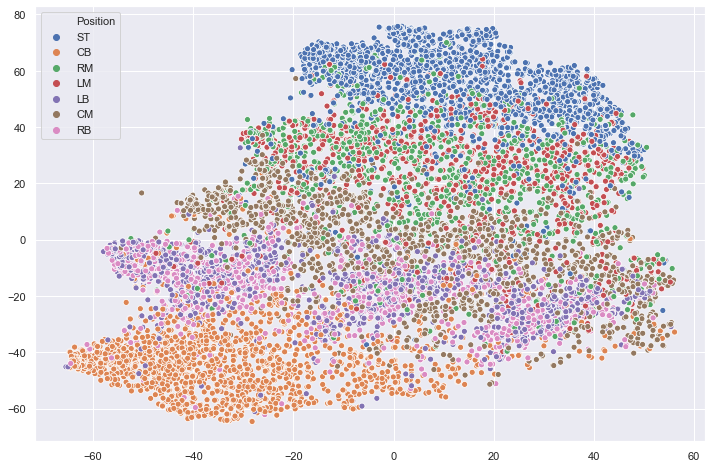

In [157]:
if __name__ == '__main__':

    c = fifa_no_gk['Position'].value_counts()
    pos = c[c>1000].index

    slicer = fifa_no_gk['Position'].isin(pos)

    sns.scatterplot(x = fifa_tsne_no_gk[:,0][slicer], y = fifa_tsne_no_gk[:,1][slicer], hue = fifa_no_gk['Position'][slicer], )
    plt.show()

### Agrupando as posicoes

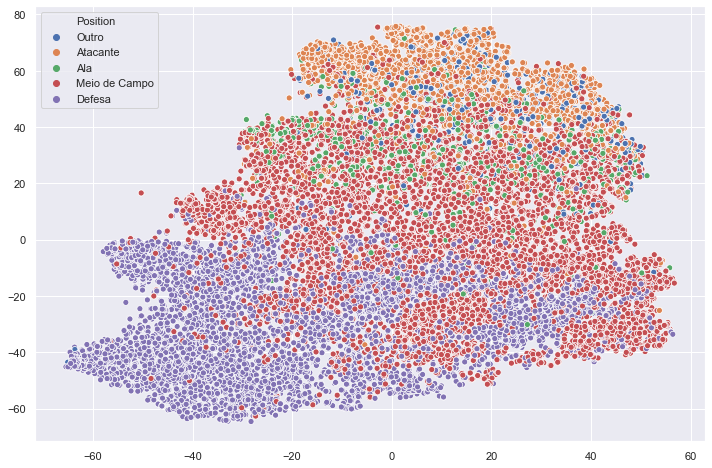

In [158]:
if __name__ == '__main__':

    def classifier(s):

        try:
            last_letter = s[-1]
        except:
            return 'Outro'

        if last_letter == 'B':
            return 'Defesa'
        if last_letter == 'M':
            return 'Meio de Campo'
        if s == 'ST':
            return 'Atacante'
        if last_letter == 'W':
            return 'Ala'
        else: 
            return 'Outro'


    sns.scatterplot(x = fifa_tsne_no_gk[:,0], y = fifa_tsne_no_gk[:,1], hue = fifa_no_gk['Position'].apply(classifier) )
    plt.show()
